<a href="https://www.kaggle.com/code/haticerumeysayan/heart-disease-simple-eda?scriptVersionId=152453148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Attribute Information:

**1. age:** age in years

**2. sex:** sex (1 = male; 0 = female)

**3. cp:** chest pain type
   * Value 1: typical angina
   * Value 1: typical angina
   * Value 2: atypical angina
   * Value 3: non-anginal pain
   * Value 4: asymptomatic
   
**4. trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

**5. chol:** serum cholestoral in mg/dl

**6. fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**7. restecg:** resting electrocardiographic results
   * Value 0: normal
   * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or
     depression of > 0.05 mV)
   * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**8. thalach:** maximum heart rate achieved

**9. exang:** exercise induced angina (1 = yes; 0 = no)

**10. oldpeak:** ST depression induced by exercise relative to rest

**11. slope:** the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
    
**12. ca:** number of major vessels (0-3) colored by flourosopy (for calcification of 
            vessels)

**13. thal:** results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable 
              defect)
              
**14. class:** target variable representing diagnosis of heart disease (angiographic
               disease status) in any major vessel. It will be transformed to:  
*  Value 0: < 50% diameter narrowing               
* Value 1: > 50% diameter narrowing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Review

In [4]:
heart_data = pd.read_csv("/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## Basic Statistics and Distributions

In [8]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


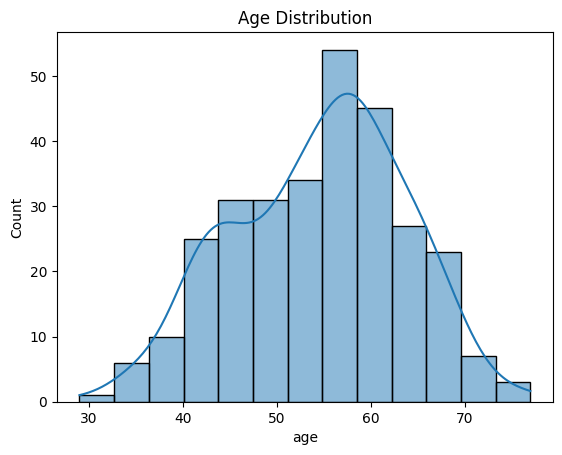

In [9]:
sns.histplot(heart_data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [10]:
correlation_matrix = heart_data.corr()
print(correlation_matrix)

                age       sex        cp  trestbps      chol       fbs  \
age        1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex       -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp         0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps   0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol       0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs        0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg    0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach   -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang      0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak    0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope      0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca         0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal       0.120795  0.370556  0.266275  0.130612  

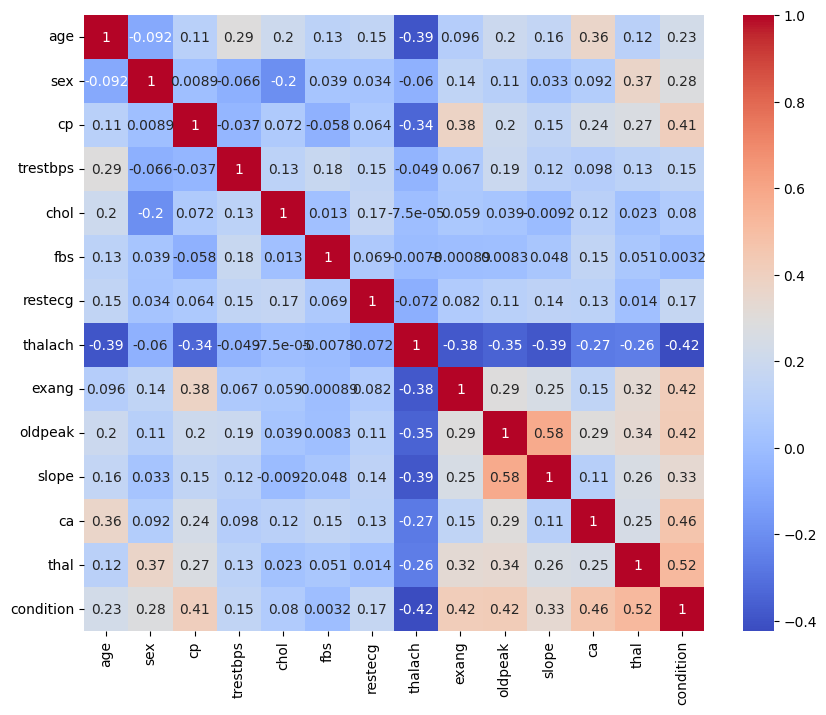

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
# Missing data check
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

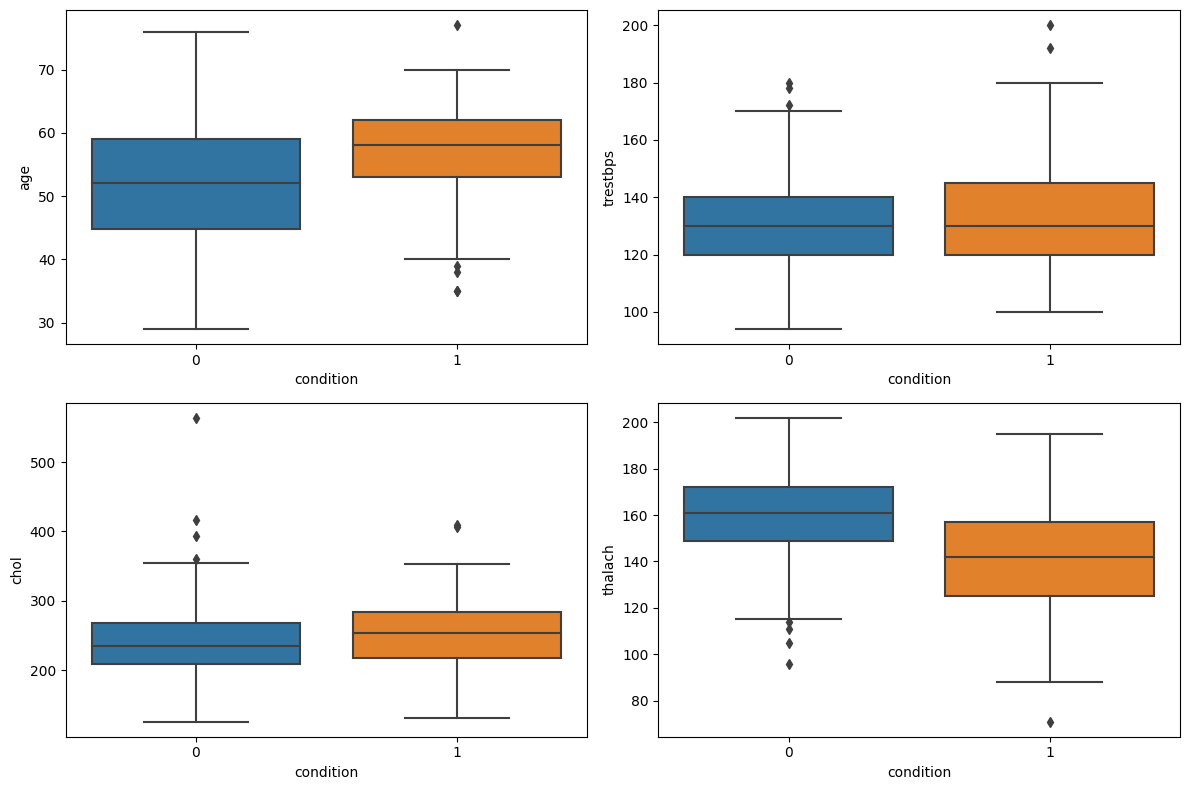

In [13]:
# Outliers
numeric_features = ['age', 'trestbps', 'chol', 'thalach']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='condition', y=feature, data=heart_data)

plt.tight_layout()
plt.show()

## Visualizing Data

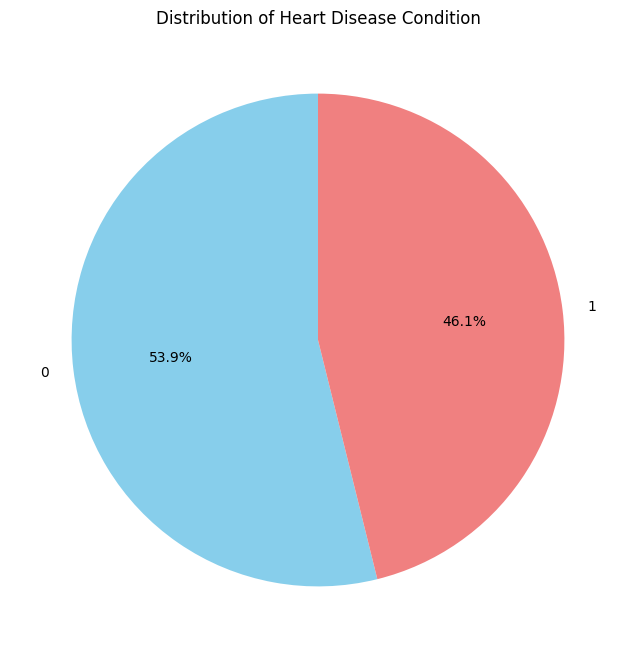

In [14]:
# Percentage distribution of heart disease condition
condition_counts = heart_data['condition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease Condition')
plt.show()

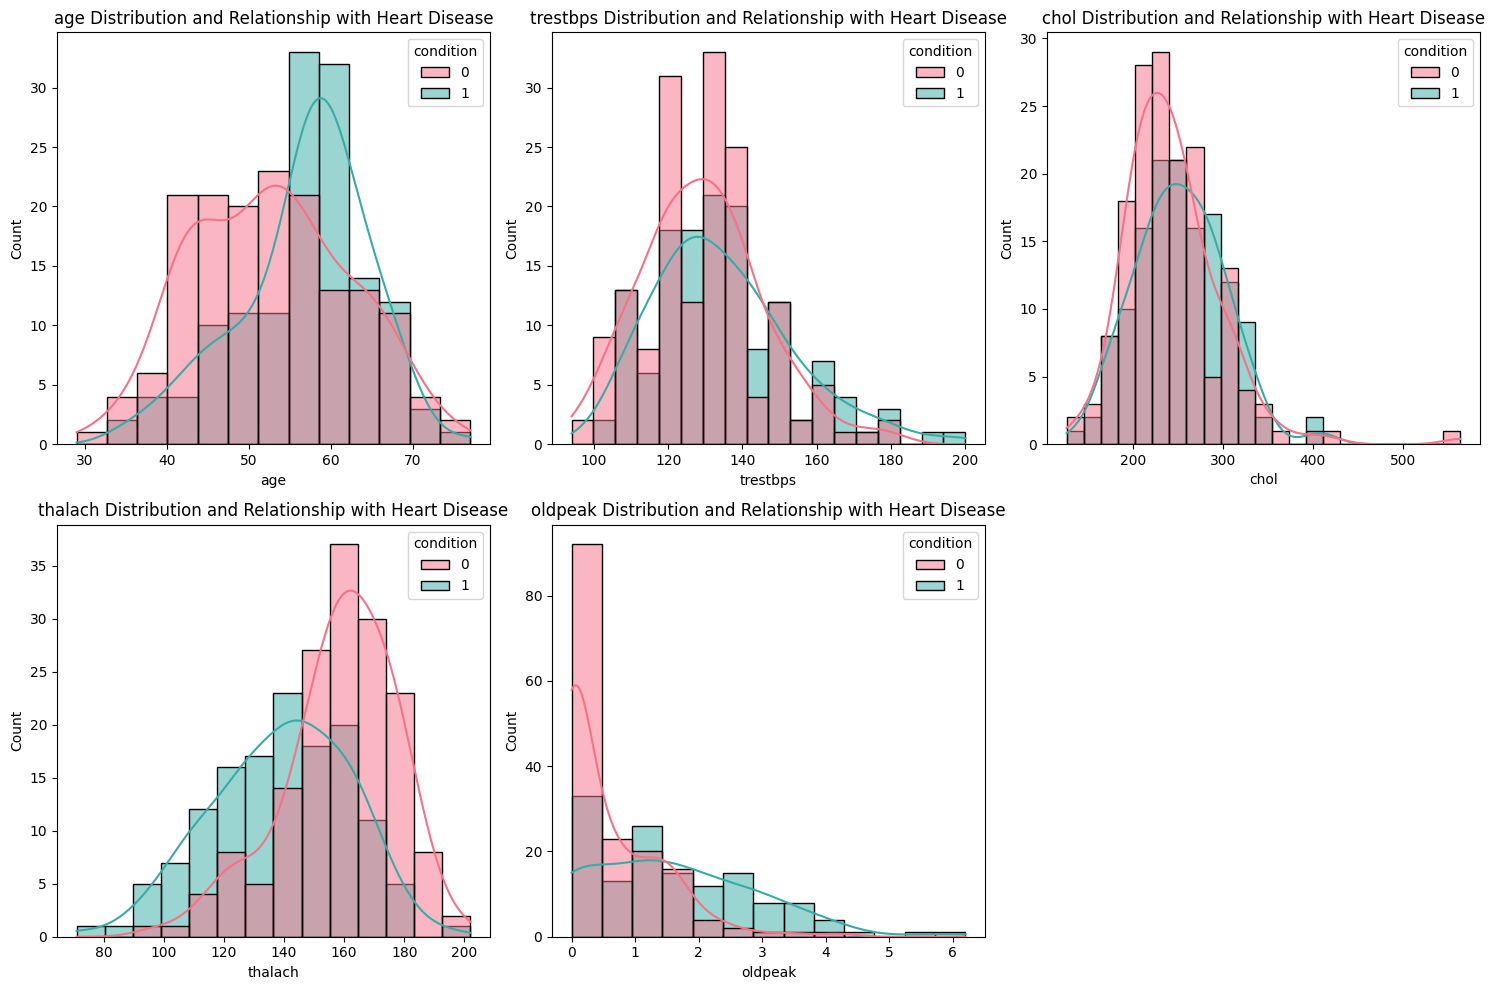

In [15]:
plt.figure(figsize=(15, 10))

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(data=heart_data, x=feature, hue='condition', kde=True, palette='husl')
    plt.title(f'{feature} Distribution and Relationship with Heart Disease')

plt.tight_layout()
plt.show()

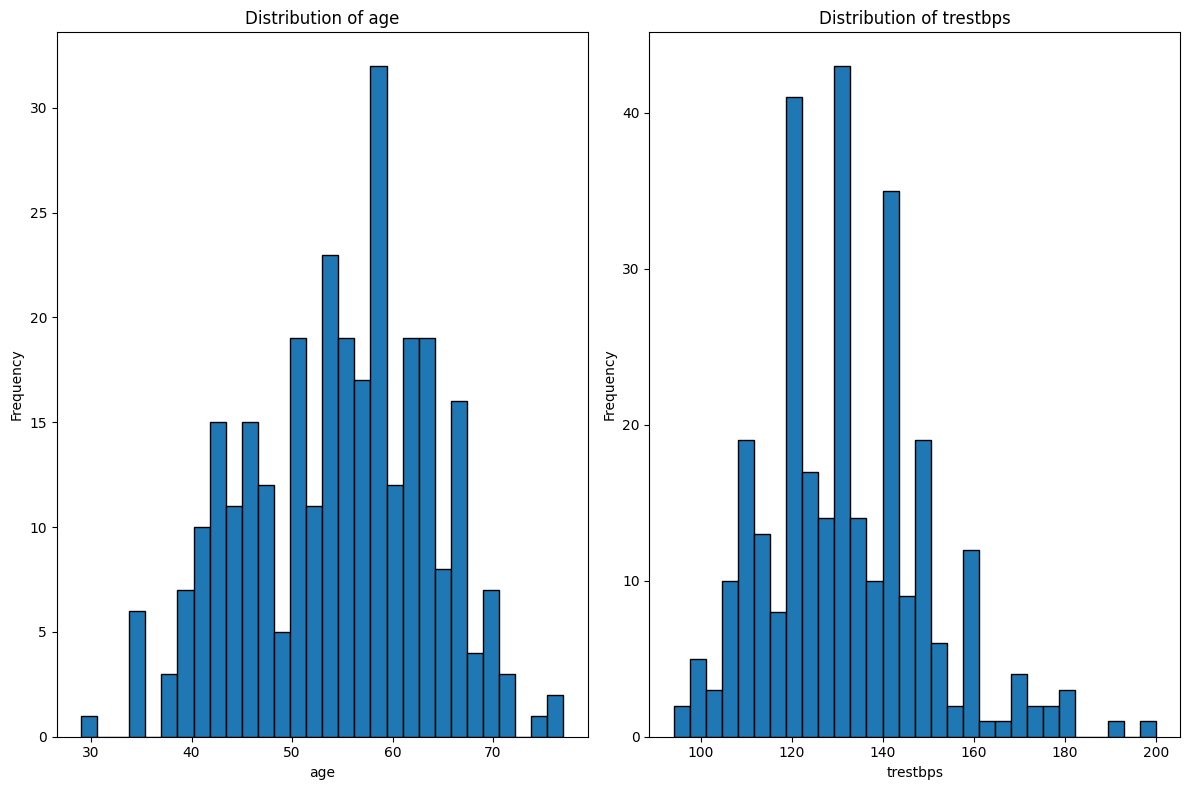

In [16]:
features_to_plot = ['age', 'trestbps']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

for i, feature in enumerate(features_to_plot):
    axes[i].hist(heart_data[feature], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

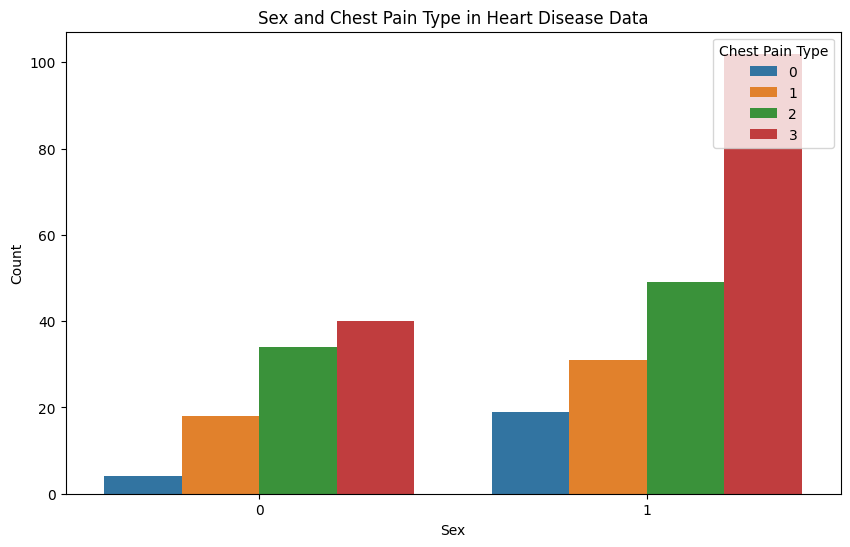

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='cp', data=heart_data)

plt.title('Sex and Chest Pain Type in Heart Disease Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right')

plt.show()

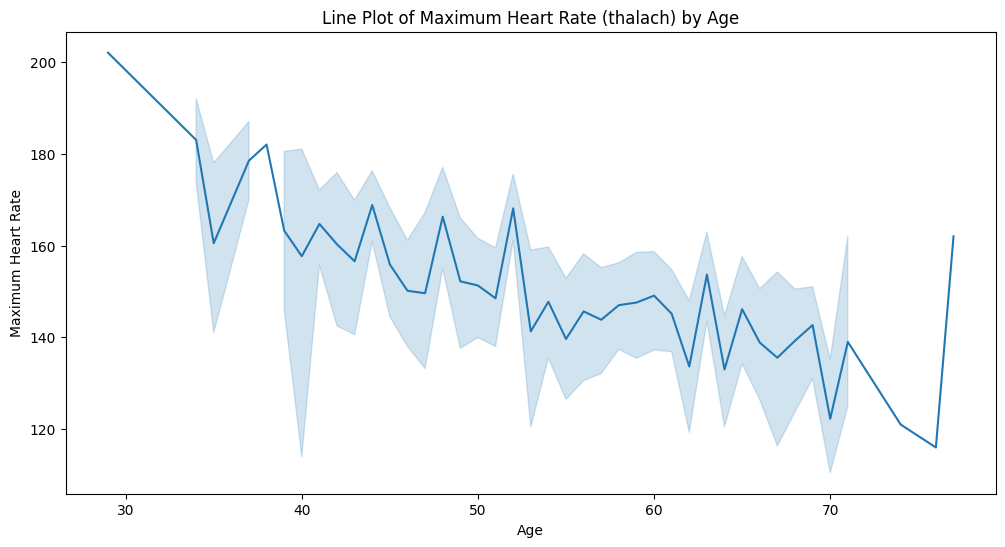

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='thalach', data=heart_data)
plt.title('Line Plot of Maximum Heart Rate (thalach) by Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()